In [1]:
!nvidia-smi

Thu May 20 11:55:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Instalacje pakietów

In [2]:
!pip install pytube

     |████████████████████████████████| 51kB 4.6MB/s 


In [3]:
!pip install facenet_pytorch

     |████████████████████████████████| 1.9MB 11.2MB/s 


In [4]:
!pip install pytorch-lightning
!pip install -q pytorch-metric-learning

     |████████████████████████████████| 808kB 10.4MB/s 
     |████████████████████████████████| 645kB 21.6MB/s 
     |████████████████████████████████| 276kB 35.7MB/s 
     |████████████████████████████████| 112kB 39.7MB/s 
     |████████████████████████████████| 829kB 35.4MB/s 
     |████████████████████████████████| 1.3MB 35.8MB/s 
     |████████████████████████████████| 296kB 33.1MB/s 
     |████████████████████████████████| 143kB 40.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=a3c2e6cff487a7c682cd9e494e36bdaf6a8a3ee92b36d4a000d390e33c7c8e76
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
     |██████████████████████

In [5]:
# restart srodowiska wykonawczego

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# definicje modeli
!gdown https://drive.google.com/uc?id=1ro_l2OHrEtng3PmB_vbFW69JgdSFk8Uv

Downloading...
From: https://drive.google.com/uc?id=1ro_l2OHrEtng3PmB_vbFW69JgdSFk8Uv
To: /content/models.py
100% 3.21k/3.21k [00:00<00:00, 6.12MB/s]


# Transformery

In [8]:
from torchvision.transforms import Compose, ToTensor, Normalize, ToPILImage, ColorJitter, RandomVerticalFlip, RandomHorizontalFlip, RandomErasing, RandomRotation, GaussianBlur

fttransformer = Compose([
                         RandomHorizontalFlip(),
                         ColorJitter(brightness=0.1, contrast=0.1, hue=0.1, saturation=0.1),
                         GaussianBlur(3, sigma=(0.1, 2.0)),
                         RandomRotation(10, expand=False),
                         ToTensor(), 
                         Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         ])

fvtransformer = Compose([ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
btransformer = Compose([Normalize([0., 0., 0.], [1 / 0.229, 1 / 0.224, 1 / 0.225]), Normalize([-0.485, -0.456, -0.406], std = [1.,1.,1.]), ToPILImage()])

# Model i ładowanie


In [9]:
# modele sa zdefiniowane w zewnetrznym pliku 'models.py'. uzyte zostaly:
# - SimpleNet (conv/relu/mp) x 4 + aap - do celow testowych, najmniejsza skutecznosc, 
#   ale szybko mozna ja wytrenowac i sprawdzic zalozenia i dzialanie samej sieci
# - resnet18 jako backbone (BackboneResnet18) + 2 x fc
# - resnet152 jako backbone (BackboneResnet152) + 2 x fc
# - vgg19 jako backbone (BackboneVgg19) + 2 x fc

from models import SimpleNet
from models import BackboneResnet18
from models import BackboneResnet152
from models import BackboneVgg19

In [10]:
def get_model(model_name, embedding_size):
  switcher = {
      'resnet18': BackboneResnet18(embedding_size),
      'vgg19': BackboneVgg19(embedding_size),
      'resnet152': BackboneResnet152(embedding_size),
      'simple': SimpleNet(embedding_size)
  }
  return switcher.get(model_name)

In [11]:
model = get_model('resnet18', 512)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [12]:
# wyuczone modele znajduja sie tutaj:
# https://drive.google.com/drive/folders/1-P_VmhRtdl6btzIurbNLTsr41tp7yKMo?usp=sharing

!gdown https://drive.google.com/uc?id=109XTj1oN1_HIzztj_WqRcgq-ikfCDlNk

Downloading...
From: https://drive.google.com/uc?id=109XTj1oN1_HIzztj_WqRcgq-ikfCDlNk
To: /content/resnet18_10x10_800.model
47.9MB [00:00, 71.4MB/s]


In [13]:
import torch
model.load_state_dict(torch.load('resnet18_10x10_800.model'))

<All keys matched successfully>

In [122]:
# model w trybie walidacyjnym
model.eval()

BackboneResnet18(
  (core): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

# Youtube i przetwarzanie klipów

## Pobieranie filmu z YT lub dowolnego innego zrodla

In [ ]:
# sciagamy film z yt
from pytube import YouTube
yt = YouTube("https://www.youtube.com/watch?v=eILEMxSq0OQ")

yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download(filename='movieclip')

In [32]:
# lub sciagamy przykladowe klipy przygotowane na potrzeby testów
# https://drive.google.com/file/d/1-enxN3F9Wlc0fIa2fRCgJtkj04vspp4D/view?usp=sharing
!gdown https://drive.google.com/uc?id=1-enxN3F9Wlc0fIa2fRCgJtkj04vspp4D
clip_name = 'english1.mp4'

# https://drive.google.com/file/d/1JRxDD1ZjUzWCu6tJOTiYuV4_iM-I2ggM/view?usp=sharing
# !gdown https://drive.google.com/uc?id=1JRxDD1ZjUzWCu6tJOTiYuV4_iM-I2ggM
# clip_name = 'english2.mp4'

# https://drive.google.com/file/d/1LjwzlodI5AJRPM-rUjnRpdm29XRNR3dV/view?usp=sharing
# !gdown https://drive.google.com/uc?id=1LjwzlodI5AJRPM-rUjnRpdm29XRNR3dV
# clip_name = 'bond2.mp4'

# https://drive.google.com/file/d/1weLu8T04QBsEXroE6bO-onl8U6Wrfv_0/view?usp=sharing
# !gdown https://drive.google.com/uc?id=1weLu8T04QBsEXroE6bO-onl8U6Wrfv_0
# clip_name = 'clip_name = 'bond2.mp4''

Downloading...
From: https://drive.google.com/uc?id=1-enxN3F9Wlc0fIa2fRCgJtkj04vspp4D
To: /content/english1.mp4
7.15MB [00:00, 43.6MB/s]


## Przygotowanie foderów

In [42]:
clip_folder = os.path.splitext(clip_name)[0]
faces_folder = 'faces_' + clip_folder
output_folder = 'output_' + clip_folder

In [45]:
# przygotowujemy katalogi pod cały proces
!rm -rf {clip_folder}
!mkdir {clip_folder}
!rm -rf {output_folder}
!mkdir {output_folder}
!rm -rf {faces_folder}
!mkdir {faces_folder}

In [43]:
# https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames

import sys
import os
import cv2

def extract_frames(file, folder):
    vidcap = cv2.VideoCapture(file)
    count = 0
    while True:
        success,image = vidcap.read()
        if not success:
            break
        cv2.imwrite(os.path.join(folder,"{:d}.jpg".format(count)), image)
        count += 1
    print("{} images are extacted in {}.".format(count, folder))
    return count

In [46]:
# wyciagamy klatki filmu
extract_frames(clip_name, clip_folder)

208 images are extacted in english1.


208

In [115]:
frames_number = 208

## Przetworzenie klatek filmu - ekstrakcja twarzy, metadanych

In [47]:
# tworzymy sieć do identyfikowania twarzy na klatkach
from facenet_pytorch import MTCNN
from PIL import Image

mtcnn = MTCNN(image_size=224)

In [48]:
# metoda do wyciagania twarzy
def extract_face(img, box, image_size=160, margin=[10, 10]):
    raw_image_size = img.size

    box[1]=box[1]-margin[0]
    box[3]=box[3]+margin[0]
    box[0]=box[0]-margin[1]
    box[2]=box[2]+margin[1]

    face = img.crop(box).copy().resize((image_size, image_size), Image.BILINEAR)
    return face, (box[3] - box[1]) * (box[2] - box[0])

In [49]:
# metoda do znajdowania twarzy i wyciagania informacji o miejscu polozenia i polu powierzchni
# wykrytej twarzy wzgledem klatki filmu

import cv2
from PIL import Image, ImageDraw
import numpy as np

def extract_face_data(frame_number, frame_folder, face_folder):
    img = Image.open(os.path.join(os.getcwd(), frame_folder, "{}.jpg".format(frame_number)))

    frame = []
    face = []
    areas = []
    embedding = []

    boxes = mtcnn.detect(img)
    if boxes[0] is not None:
      for i in range(0, len(boxes[0])):
          crop_img, area = extract_face(img, boxes[0][i])

          # save face image
          crop_img.save(os.path.join(os.getcwd(), face_folder, str(frame_number) + '_' + str(i) + '.jpg'))
          frame.append(frame_number)
          face.append(i)
          areas.append(area)
         
          x = fvtransformer(crop_img)
          y = model.forward(torch.unsqueeze(x, 0))
          embedding.append(y.detach().numpy()[0])

    return frame, face, embedding, areas

In [51]:
import os

frames = []
faces = []
embeddings = []
areas = []

# zbieramy dane dotyczace twarzy znalezionych
# na klatach filmu

for i in range(1, frames_number):
    frame, face, embedding, area = extract_face_data(i, clip_folder, faces_folder)

    frames += frame
    faces += face
    embeddings += embedding
    areas += area

## Budowanie DataFrame'ów

In [52]:
# z wyciagnietych danych mozemy przygotowac dataframe z embedingami

import pandas as pd

edf = pd.DataFrame(data=embeddings, columns=['x' + str(i) for i in range(0, 512)])
edf

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x472,x473,x474,x475,x476,x477,x478,x479,x480,x481,x482,x483,x484,x485,x486,x487,x488,x489,x490,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500,x501,x502,x503,x504,x505,x506,x507,x508,x509,x510,x511
0,-0.008093,0.064724,0.055490,-0.054880,-0.012004,-0.026024,-0.015315,-0.041126,-0.010494,-0.111150,-0.050496,0.018300,0.020000,0.026507,-0.047705,-0.042097,0.092505,0.059787,0.021792,-0.006649,0.069916,0.031499,0.015038,-0.020619,-0.032862,-0.020887,-0.044211,-0.018502,-0.013595,-0.027380,-0.077348,-0.091460,-0.059943,0.073269,-0.013923,0.002648,0.042678,0.051029,-0.055273,-0.030570,...,-0.058689,0.079877,0.002296,-0.029119,0.019675,0.022639,-0.055882,0.040595,0.017384,0.004791,0.006019,0.028215,0.073571,0.052202,-0.096530,-0.017217,-0.083874,0.047202,-0.014744,-0.106033,-0.006842,0.059041,0.018491,0.062943,0.030300,0.051860,0.016715,-0.008862,0.059813,-0.015314,-0.078378,-0.062473,-0.022673,0.007196,0.036534,-0.001503,-0.022217,-0.056326,-0.003639,-0.059805
1,0.065466,0.056086,-0.039868,-0.040200,-0.021602,0.011421,-0.021151,-0.082456,0.007747,-0.047858,0.001687,0.005685,0.103072,0.030304,-0.033123,-0.089935,0.071707,0.018975,-0.057595,0.005027,0.010667,0.024496,-0.018516,-0.037554,-0.054324,-0.049783,-0.057312,0.006087,-0.035111,-0.022640,-0.058518,-0.089395,-0.008780,0.008572,0.027039,-0.042055,0.048930,0.013032,-0.077988,-0.017758,...,-0.021366,0.000241,0.052828,0.003371,0.014183,0.020625,-0.077400,0.057893,0.016996,-0.039564,0.033085,0.005018,0.113009,0.046687,-0.093935,-0.008032,-0.039611,-0.023391,-0.045250,-0.037539,-0.021683,0.031747,-0.005578,0.031403,0.027309,-0.023517,-0.044841,-0.033284,0.062912,-0.048300,-0.071599,-0.101253,-0.030025,0.017288,0.044748,-0.018282,0.053047,0.029724,0.020169,-0.015452
2,-0.010351,0.052682,0.051740,-0.060800,0.008847,-0.023539,-0.032202,-0.027402,-0.010259,-0.098125,-0.036362,0.017336,0.037755,0.032542,-0.045237,-0.043588,0.075431,0.045601,0.002150,-0.012727,0.090562,0.033679,-0.013805,-0.018546,-0.049470,-0.019014,-0.048737,-0.009879,0.004475,-0.012329,-0.053529,-0.102141,-0.059167,0.068528,-0.028836,-0.005334,0.052027,0.052706,-0.049662,-0.040016,...,-0.066890,0.080111,-0.002607,-0.049973,0.032311,0.030235,-0.055879,0.025872,0.002188,0.007178,0.027103,0.037328,0.084780,0.054301,-0.092704,-0.019460,-0.099735,0.027686,-0.010020,-0.105096,-0.012846,0.062420,0.003357,0.059786,0.038795,0.043275,0.029327,-0.005832,0.074438,-0.017390,-0.077623,-0.087709,-0.034988,-0.002279,0.037452,-0.013126,-0.000077,-0.062419,-0.010451,-0.069142
3,0.066125,0.054633,-0.041150,-0.040833,-0.023468,0.010665,-0.020966,-0.081618,0.008524,-0.046597,0.002104,0.005806,0.102166,0.030750,-0.033212,-0.091131,0.073536,0.019242,-0.060493,0.005192,0.008267,0.026455,-0.017094,-0.036652,-0.053285,-0.049096,-0.054773,0.004628,-0.036393,-0.024278,-0.059157,-0.087709,-0.006934,0.008544,0.028709,-0.039827,0.049681,0.011361,-0.078027,-0.019085,...,-0.022409,-0.000802,0.054449,0.002523,0.015038,0.021474,-0.076689,0.059052,0.018526,-0.040916,0.031977,0.004495,0.110926,0.047796,-0.092746,-0.007263,-0.038404,-0.024130,-0.044860,-0.036669,-0.020745,0.028701,-0.004134,0.032823,0.028052,-0.023171,-0.042282,-0.032616,0.062077,-0.047231,-0.073623,-0.099230,-0.032622,0.015405,0.046107,-0.017608,0.048674,0.028628,0.019483,-0.016048
4,-0.012879,0.049019,0.063986,-0.042367,-0.009019,-0.025144,-0.032355,-0.039430,-0.014647,-0.107488,-0.041910,0.011864,0.031654,0.027588,-0.045341,-0.025360,0.080174,0.047753,0.003453,-0.005487,0.080969,0.023620,-0.001871,-0.009108,-0.039367,-0.022345,-0.046066,-0.006910,0.009181,-0.019110,-0.063788,-0.104560,-0.046113,0.067683,-0.017325,-0.004991,0.047978,0.044947,-0.045309,-0.034360,...,-0.062992,0.080518,-0.006557,-0.044946,0.013852,0.032956,-0.060342,0.032279,0.012153,0.023831,0.019365,0.022200,0.068117,0.058827,-0.108311,-0.019592,-0.106021,0.039628,0.001

In [53]:
# oraz data frame z meta danymi

import pandas as pd

mdf = pd.DataFrame(data={'frame': frames, 'face': faces, 'area': areas })
mdf

,frame,face,area
0,1,0,19785.552734
1,1,1,12777.324219
2,2,0,19195.921875
3,2,1,12797.709961
4,3,0,19286.621094
...,...,...,...
404,206,0,7999.801758
405,206,1,5814.219727
406,207,0,8463.883789
407,207,1,5677.443359


In [54]:
# łaczenie danych względem kolejności

df = pd.concat([mdf, edf], axis=1)
df

,frame,face,area,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,...,x472,x473,x474,x475,x476,x477,x478,x479,x480,x481,x482,x483,x484,x485,x486,x487,x488,x489,x490,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500,x501,x502,x503,x504,x505,x506,x507,x508,x509,x510,x511
0,1,0,19785.552734,-0.008093,0.064724,0.055490,-0.054880,-0.012004,-0.026024,-0.015315,-0.041126,-0.010494,-0.111150,-0.050496,0.018300,0.020000,0.026507,-0.047705,-0.042097,0.092505,0.059787,0.021792,-0.006649,0.069916,0.031499,0.015038,-0.020619,-0.032862,-0.020887,-0.044211,-0.018502,-0.013595,-0.027380,-0.077348,-0.091460,-0.059943,0.073269,-0.013923,0.002648,0.042678,...,-0.058689,0.079877,0.002296,-0.029119,0.019675,0.022639,-0.055882,0.040595,0.017384,0.004791,0.006019,0.028215,0.073571,0.052202,-0.096530,-0.017217,-0.083874,0.047202,-0.014744,-0.106033,-0.006842,0.059041,0.018491,0.062943,0.030300,0.051860,0.016715,-0.008862,0.059813,-0.015314,-0.078378,-0.062473,-0.022673,0.007196,0.036534,-0.001503,-0.022217,-0.056326,-0.003639,-0.059805
1,1,1,12777.324219,0.065466,0.056086,-0.039868,-0.040200,-0.021602,0.011421,-0.021151,-0.082456,0.007747,-0.047858,0.001687,0.005685,0.103072,0.030304,-0.033123,-0.089935,0.071707,0.018975,-0.057595,0.005027,0.010667,0.024496,-0.018516,-0.037554,-0.054324,-0.049783,-0.057312,0.006087,-0.035111,-0.022640,-0.058518,-0.089395,-0.008780,0.008572,0.027039,-0.042055,0.048930,...,-0.021366,0.000241,0.052828,0.003371,0.014183,0.020625,-0.077400,0.057893,0.016996,-0.039564,0.033085,0.005018,0.113009,0.046687,-0.093935,-0.008032,-0.039611,-0.023391,-0.045250,-0.037539,-0.021683,0.031747,-0.005578,0.031403,0.027309,-0.023517,-0.044841,-0.033284,0.062912,-0.048300,-0.071599,-0.101253,-0.030025,0.017288,0.044748,-0.018282,0.053047,0.029724,0.020169,-0.015452
2,2,0,19195.921875,-0.010351,0.052682,0.051740,-0.060800,0.008847,-0.023539,-0.032202,-0.027402,-0.010259,-0.098125,-0.036362,0.017336,0.037755,0.032542,-0.045237,-0.043588,0.075431,0.045601,0.002150,-0.012727,0.090562,0.033679,-0.013805,-0.018546,-0.049470,-0.019014,-0.048737,-0.009879,0.004475,-0.012329,-0.053529,-0.102141,-0.059167,0.068528,-0.028836,-0.005334,0.052027,...,-0.066890,0.080111,-0.002607,-0.049973,0.032311,0.030235,-0.055879,0.025872,0.002188,0.007178,0.027103,0.037328,0.084780,0.054301,-0.092704,-0.019460,-0.099735,0.027686,-0.010020,-0.105096,-0.012846,0.062420,0.003357,0.059786,0.038795,0.043275,0.029327,-0.005832,0.074438,-0.017390,-0.077623,-0.087709,-0.034988,-0.002279,0.037452,-0.013126,-0.000077,-0.062419,-0.010451,-0.069142
3,2,1,12797.709961,0.066125,0.054633,-0.041150,-0.040833,-0.023468,0.010665,-0.020966,-0.081618,0.008524,-0.046597,0.002104,0.005806,0.102166,0.030750,-0.033212,-0.091131,0.073536,0.019242,-0.060493,0.005192,0.008267,0.026455,-0.017094,-0.036652,-0.053285,-0.049096,-0.054773,0.004628,-0.036393,-0.024278,-0.059157,-0.087709,-0.006934,0.008544,0.028709,-0.039827,0.049681,...,-0.022409,-0.000802,0.054449,0.002523,0.015038,0.021474,-0.076689,0.059052,0.018526,-0.040916,0.031977,0.004495,0.110926,0.047796,-0.092746,-0.007263,-0.038404,-0.024130,-0.044860,-0.036669,-0.020745,0.028701,-0.004134,0.032823,0.028052,-0.023171,-0.042282,-0.032616,0.062077,-0.047231,-0.073623,-0.099230,-0.032622,0.015405,0.046107,-0.017608,0.048674,0.028628,0.019483,-0.016048
4,3,0,19286.621094,-0.012879,0.049019,0.063986,-0.042367,-0.009019,-0.025144,-0.032355,-0.039430,-0.014647,-0.107488,-0.041910,0.011864,0.031654,0.027588,-0.045341,-0.025360,0.080174,0.047753,0.003453,-0.005487,0.080969,0.023620,-0.001871,-0.009108,-0.039367,-0.022345,-0.046066,-0.006910,0.009181,-0.019110,-0.063788,-0.104560,-0.046113,0.067683,-0.017325,-0.004991,0.047978,...,-0.062992,0.080518,-0.006557,-0.044946,0.013852,0.032956,-0.060342,0.032279,0.012153,0.023831,0.019365,0.022200,0.068117,0.058827,-0.108311,-0.019592,-0.106021,0.039628,0.001927,-0.124036,-0.023761,0.057896,0.022150,0.037807,0.033

## Filtrowanie wykrytych twarzy na podstawie ich wielkości

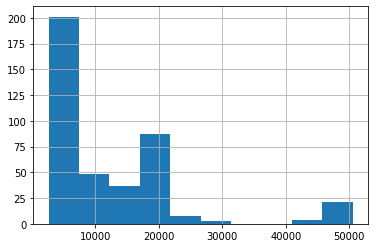

In [56]:
# jak duże twarze sa wykryte
mdf['area'].hist()

In [57]:
# do obróbki potrzebujemy wyselekcjonować twarze na głównym
# planie

selection = (mdf['area'] > 12000) & (mdf['area'] < 80000) 

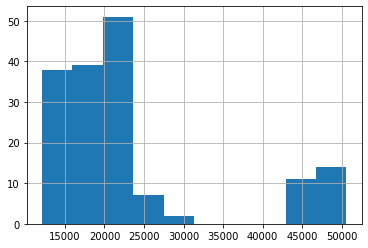

In [58]:
mdf[selection]['area'].hist()

In [62]:
# kopie danych (będziemy je modyfikować pózniej)
edf_filtered = edf[selection].copy()
mdf_filtered = mdf[selection].copy()

## Analiza chmury danych (embedingów), PCA + DBScan

In [123]:
# chmurę punktów (wektorów - embedingów) 
# rzutujemy na 3d via PCA

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=3)
pca_result = pca.fit_transform(edf_filtered.values)

pca_x = pca_result[:,0]
pca_y = pca_result[:,1] 
pca_z = pca_result[:,2]

In [ ]:
rndperm = np.random.permutation(edf_filtered.shape[0])

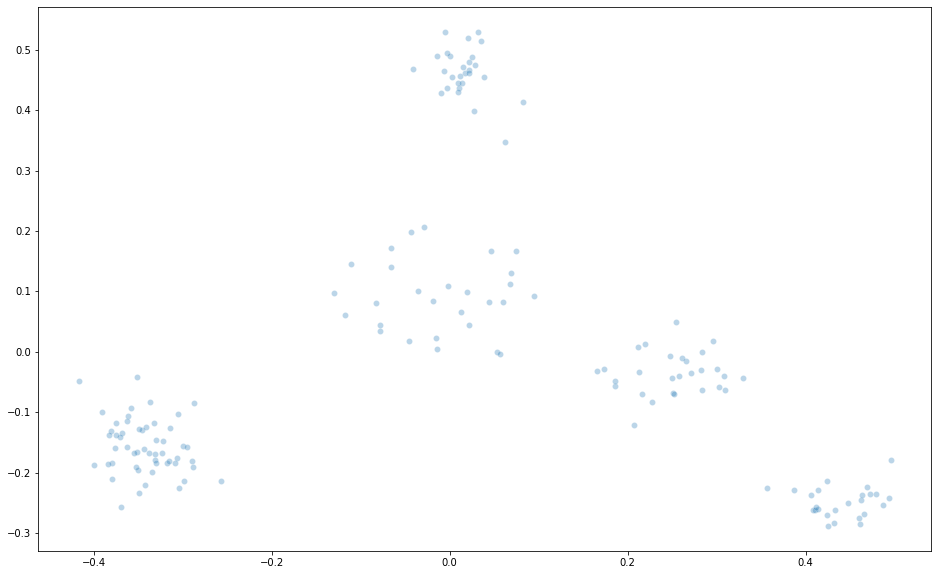

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(16,10))
sns.scatterplot(x=pca_x, y=pca_y,alpha=0.3)

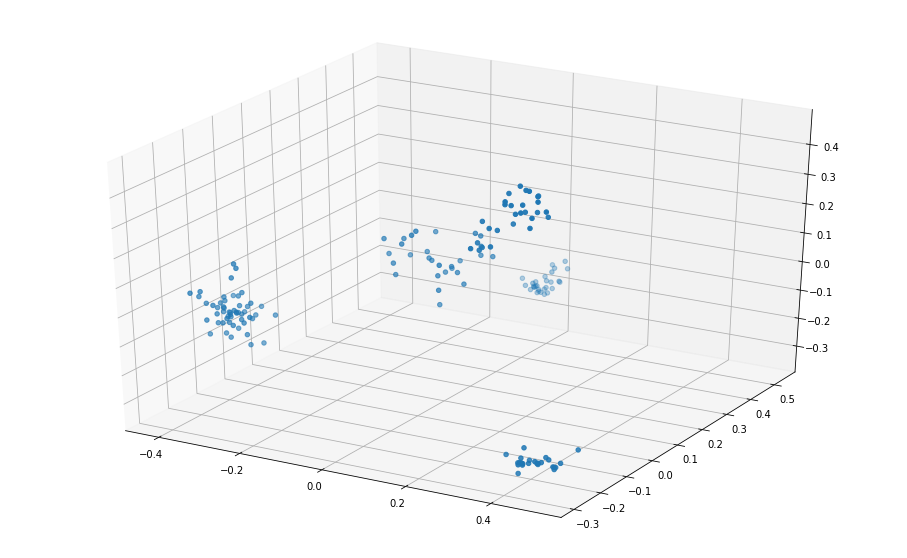

In [65]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=pca_x, ys=pca_y, zs=pca_z)
plt.show()

In [74]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# ustawienia dbscana mozna zmieniac, dopasowywac do tego co widac z PCA, badz 
# do informacji o ilosci aktorow bioracych udzial w scenie

db = DBSCAN(eps=0.6, min_samples=10).fit(edf_filtered.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# liczba klastrów i punktów oznaczonych jako szum
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

5
15


In [75]:
labels

array([ 1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  0,  1,
       -1,  0,  1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
       -1, -1, -1, -1, -1, -1, -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3, -1, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, -1])

In [77]:
# dodanie informacji o labelce do danych dataframe'a
mdf_filtered['label'] = labels

In [79]:
# filrujemy dane które dostały swój label
edf_labeled = edf_filtered[labels >= 0].copy()
mdf_labeled = mdf_filtered[labels >= 0].copy()

In [80]:
mdf_labeled

,frame,face,area,label
0,1,0,19785.552734,1
1,1,1,12777.324219,0
2,2,0,19195.921875,1
3,2,1,12797.709961,0
4,3,0,19286.621094,1
...,...,...,...,...
205,126,0,17420.996094,4
207,127,0,20674.121094,4
209,128,0,20165.443359,4
211,129,0,20402.388672,4


## Tagowanie skupień

In [95]:
# sprawdzamy poszczególne klasy - czym sa (a wlasciwie kim sa aktorzy)
import matplotlib.pyplot as plt

def show_face(face_folder, frame, face):
  plt.imshow(Image.open(os.path.join(os.getcwd(), face_folder, str(frame) + '_' + str(face) + '.jpg')))

In [97]:
mdf_labeled[mdf_labeled['label'] == 0].head()

,frame,face,area,label
1,1,1,12777.324219,0
3,2,1,12797.709961,0
5,3,1,12852.889648,0
7,4,1,12857.696289,0
9,5,1,12985.400391,0


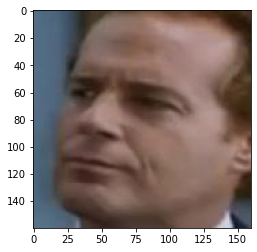

In [98]:
show_face(faces_folder, 1, 1) 
# Adam James

In [99]:
mdf_labeled[mdf_labeled['label'] == 1].head()

,frame,face,area,label
0,1,0,19785.552734,1
2,2,0,19195.921875,1
4,3,0,19286.621094,1
6,4,0,18525.021484,1
8,5,0,18065.039062,1


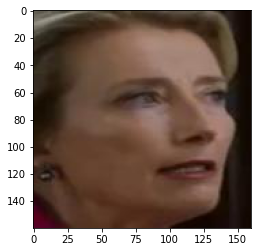

In [101]:
show_face(faces_folder, 1, 0) 
# Emma Thompson

In [102]:
mdf_labeled[mdf_labeled['label'] == 2].head()

,frame,face,area,label
60,29,0,50120.488281,2
61,30,0,48704.113281,2
62,31,0,46328.593750,2
63,32,0,45956.578125,2
64,33,0,45868.515625,2


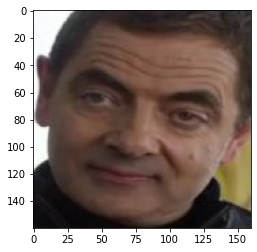

In [104]:
show_face(faces_folder, 29, 0) 
# Rowan Atkonson

In [105]:
mdf_labeled[mdf_labeled['label'] == 3].head()

,frame,face,area,label
93,62,0,19555.642578,3
94,63,0,19980.734375,3
96,65,0,21688.804688,3
97,66,0,21728.939453,3
98,67,0,23412.818359,3


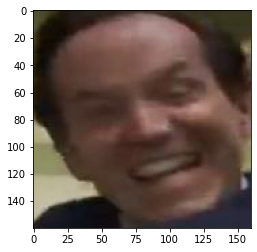

In [107]:
show_face(faces_folder, 62, 0) 
# Ben Miller

In [108]:
mdf_labeled[mdf_labeled['label'] == 4].head()

,frame,face,area,label
109,78,0,21276.060547,4
111,79,0,21424.955078,4
113,80,0,21480.585938,4
115,81,0,19357.488281,4
117,82,0,19516.005859,4


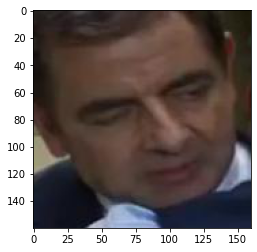

In [112]:
show_face(faces_folder, 78, 0) 
# Rowan Atkonson

In [113]:
names = [
         'Adam James',
         'Emma Thompson',
         'Rowan Atkonson',
         'Ben Miller',
         'Rowan Atkonson'
]

## Tagowanie klatek filmu

In [116]:
# metoda do tagowania twarzy i podpisywania ich
def tag(frame_number, frame_folder, face_folder, df):
    print('Przetwarzanie klatki {}...'.format(frame_number))

    img = Image.open(os.path.join(os.getcwd(), frame_folder, "{}.jpg".format(frame_number)))
    out = img.copy()

    draw = ImageDraw.Draw(out)

    boxes = mtcnn.detect(img)
    if boxes[0] is not None:
        for i in range(0, len(boxes[0])):
            count = df[(df['frame'] == frame_number) & (df['face'] == i)]['label'].count()

            if count == 1:
                label = df[(df['frame'] == frame_number) & (df['face'] == i)]['label'].item()

                draw.rectangle(boxes[0][i], width=2, outline=(255,0,0))
                draw.text([boxes[0][i][0], boxes[0][i][3] + 10], names[label] + ' (' + str(label) + ')')

    out.save(os.path.join(os.getcwd(), frame_folder, "{}.jpg".format(frame_number)))    

In [117]:
# tagujemy klatki filmu
for i in range(1, frames_number):
    tag(i, clip_folder, faces_folder, mdf_labeled)

Przetwarzanie klatki 1...
Przetwarzanie klatki 2...
Przetwarzanie klatki 3...
Przetwarzanie klatki 4...
Przetwarzanie klatki 5...
Przetwarzanie klatki 6...
Przetwarzanie klatki 7...
Przetwarzanie klatki 8...
Przetwarzanie klatki 9...
Przetwarzanie klatki 10...
Przetwarzanie klatki 11...
Przetwarzanie klatki 12...
Przetwarzanie klatki 13...
Przetwarzanie klatki 14...
Przetwarzanie klatki 15...
Przetwarzanie klatki 16...
Przetwarzanie klatki 17...
Przetwarzanie klatki 18...
Przetwarzanie klatki 19...
Przetwarzanie klatki 20...
Przetwarzanie klatki 21...
Przetwarzanie klatki 22...
Przetwarzanie klatki 23...
Przetwarzanie klatki 24...
Przetwarzanie klatki 25...
Przetwarzanie klatki 26...
Przetwarzanie klatki 27...
Przetwarzanie klatki 28...
Przetwarzanie klatki 29...
Przetwarzanie klatki 30...
Przetwarzanie klatki 31...
Przetwarzanie klatki 32...
Przetwarzanie klatki 33...
Przetwarzanie klatki 34...
Przetwarzanie klatki 35...
Przetwarzanie klatki 36...
Przetwarzanie klatki 37...
Przetwarza

## Zapisanie gotowego klipu

In [121]:
# tworzenie otagowanego klipu

import os
import moviepy.video.io.ImageSequenceClip

image_files = [os.path.join(os.getcwd(), clip_folder, '{}.jpg'.format(str(idx))) for idx in range(1, frames_number)]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=25)
clip.write_videofile(filename=clip_folder + '_tagged.mp4', codec='libx264')

[MoviePy] >>>> Building video english1_tagged.mp4
[MoviePy] Writing video english1_tagged.mp4


100%|██████████| 207/207 [00:10<00:00, 20.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: english1_tagged.mp4 



# Przykłady

In [124]:
# bond1: https://www.youtube.com/watch?v=6lEDlBRbF20
# otagowany: https://www.youtube.com/watch?v=e6zc-O5iUsA

In [125]:
# english1: https://www.youtube.com/watch?v=TrFm6G4D5m0
# otagowany: https://www.youtube.com/watch?v=BGiXz1eheME